# Matplotlib image practice

Following and playing around with the <a href="http://matplotlib.org/users/image_tutorial.html">matplotlib image tutorial</a>

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math


%matplotlib inline

## Importing image data into Numpy arrays

In [3]:
img=mpimg.imread('stinkbug.png')
img

array([[[ 0.40784314,  0.40784314,  0.40784314],
        [ 0.40784314,  0.40784314,  0.40784314],
        [ 0.40784314,  0.40784314,  0.40784314],
        ..., 
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098]],

       [[ 0.41176471,  0.41176471,  0.41176471],
        [ 0.41176471,  0.41176471,  0.41176471],
        [ 0.41176471,  0.41176471,  0.41176471],
        ..., 
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098],
        [ 0.42745098,  0.42745098,  0.42745098]],

       [[ 0.41960785,  0.41960785,  0.41960785],
        [ 0.41568628,  0.41568628,  0.41568628],
        [ 0.41568628,  0.41568628,  0.41568628],
        ..., 
        [ 0.43137255,  0.43137255,  0.43137255],
        [ 0.43137255,  0.43137255,  0.43137255],
        [ 0.43137255,  0.43137255,  0.43137255]],

       ..., 
       [[ 0.43921569,  0.43921569,  0.43921569],
        

## Plotting numpy arrays as images

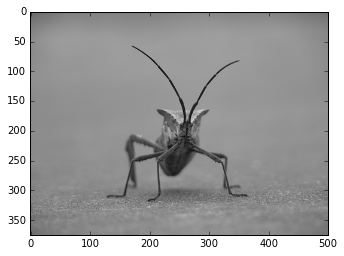

In [4]:
imgplot = plt.imshow(img)

### Applying pseudocolor schemes to image plots

In [5]:
lum_img = img[:,:,0]
lum_img

array([[ 0.40784314,  0.40784314,  0.40784314, ...,  0.42745098,
         0.42745098,  0.42745098],
       [ 0.41176471,  0.41176471,  0.41176471, ...,  0.42745098,
         0.42745098,  0.42745098],
       [ 0.41960785,  0.41568628,  0.41568628, ...,  0.43137255,
         0.43137255,  0.43137255],
       ..., 
       [ 0.43921569,  0.43529412,  0.43137255, ...,  0.45490196,
         0.4509804 ,  0.4509804 ],
       [ 0.44313726,  0.44313726,  0.43921569, ...,  0.4509804 ,
         0.44705883,  0.44705883],
       [ 0.44313726,  0.4509804 ,  0.4509804 , ...,  0.44705883,
         0.44705883,  0.44313726]], dtype=float32)

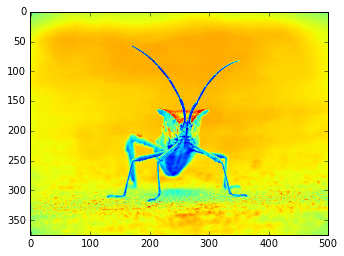

In [6]:
plt.imshow(lum_img)

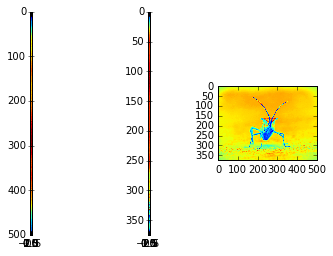

In [7]:
# explore this slicing further
other_img = img[0,:,:]
other_img2 = img[:,0,:]
plt.subplot(131)
plt.imshow(other_img)
plt.subplot(132)
plt.imshow(other_img2)
plt.subplot(133)
plt.imshow(lum_img)

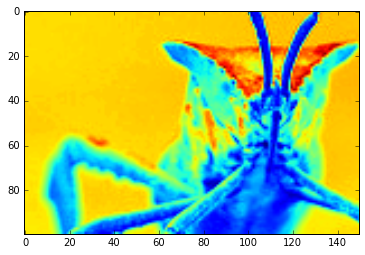

In [8]:
# and more slicing
# img[rows, columns, pixelvalues]
piece = img[150:250, 150:300,:]
plt.imshow(piece)
piece2 = img[150:250, 150:300,0]
plt.imshow(piece2);

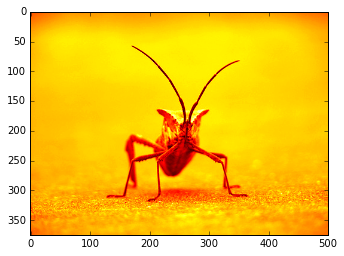

In [9]:
plt.imshow(lum_img, cmap="hot");

<a href="http://matplotlib.org/examples/color/colormaps_reference.html">Many colormaps here!</a>

Total cmaps: 75
Colormaps in Perceptually Uniform Sequential: 4
Colormaps in Sequential: 18
Colormaps in Sequential (2): 12
Colormaps in Diverging: 12
Colormaps in Qualitative: 12
Could not plot: Vega10
Could not plot: Vega20
Could not plot: Vega20b
Could not plot: Vega20c
Colormaps in Miscellaneous: 17


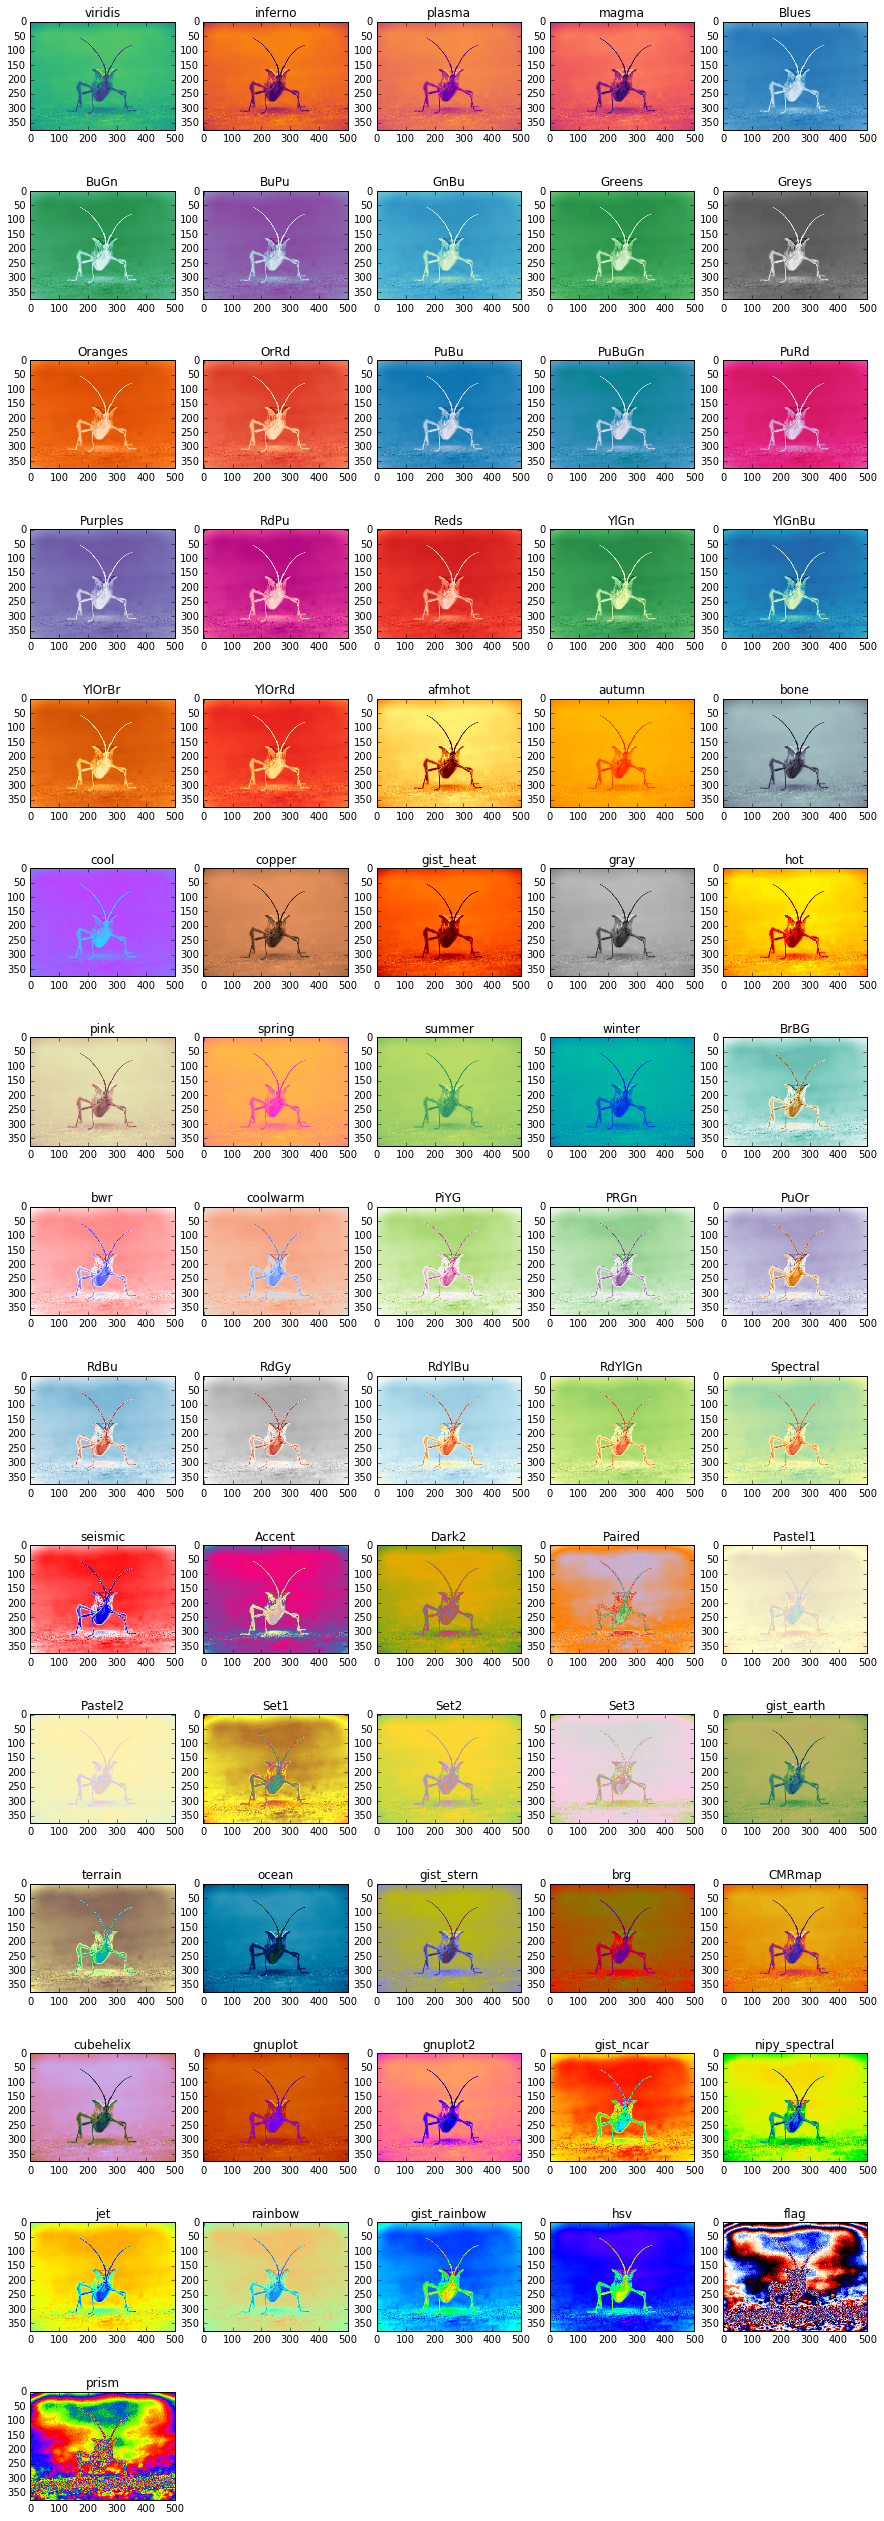

In [10]:
# Now here's a nice subplot exercise

def apply_all_cmaps(lum_img):

    cmaps = [('Perceptually Uniform Sequential',
                                ['viridis', 'inferno', 'plasma', 'magma']),
             ('Sequential',     ['Blues', 'BuGn', 'BuPu',
                                 'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd',
                                 'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu',
                                 'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd']),
             ('Sequential (2)', ['afmhot', 'autumn', 'bone', 'cool',
                                 'copper', 'gist_heat', 'gray', 'hot',
                                 'pink', 'spring', 'summer', 'winter']),
             ('Diverging',      ['BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr',
                                 'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'Spectral',
                                 'seismic']),
             ('Qualitative',    ['Accent', 'Dark2', 'Paired', 'Pastel1',
                                 'Pastel2', 'Set1', 'Set2', 'Set3', 'Vega10',
                                 'Vega20', 'Vega20b', 'Vega20c']),
             ('Miscellaneous',  ['gist_earth', 'terrain', 'ocean', 'gist_stern',
                                 'brg', 'CMRmap', 'cubehelix',
                                 'gnuplot', 'gnuplot2', 'gist_ncar',
                                 'nipy_spectral', 'jet', 'rainbow',
                                 'gist_rainbow', 'hsv', 'flag', 'prism'])]

    total_cmaps = 0
    for category in cmaps:
        total_cmaps += len(category[1])
    print("Total cmaps: {}".format(total_cmaps))

    subplot_columns = 5
    subplot_rows = math.ceil(total_cmaps/subplot_columns)
    subplots_so_far = 0
    plt.figure(figsize=(subplot_columns*3,subplot_rows*3))
    for category in cmaps:
        maps = len(category[1])
        print("Colormaps in {}:".format(category[0]), maps)
        for color_map in category[1]:
            try:
                plt.subplot(subplot_rows, subplot_columns, 1 + subplots_so_far)
                plt.imshow(lum_img, cmap=color_map)
                plt.title(color_map)
                subplots_so_far += 1
            except ValueError:
                print("Could not plot: {}".format(color_map))
                continue

apply_all_cmaps(lum_img)

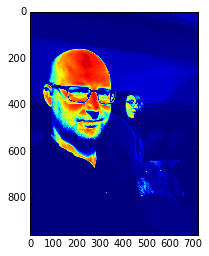

In [11]:
bw = mpimg.imread("bw.jpeg")
lum_bw = bw[:,:,0]
plt.imshow(lum_bw);

In [12]:
bw_png = mpimg.imread("bw.png")
bw_png
lum_bw_png = bw_png[:,:,0]
lum_bw_png

array([[ 0.00784314,  0.00784314,  0.00784314, ...,  0.05490196,
         0.04705882,  0.03921569],
       [ 0.00784314,  0.00784314,  0.00784314, ...,  0.04705882,
         0.03921569,  0.03529412],
       [ 0.00784314,  0.00784314,  0.00784314, ...,  0.03921569,
         0.03529412,  0.03137255],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.00784314,
         0.01176471,  0.01176471],
       [ 0.        ,  0.        ,  0.        , ...,  0.00784314,
         0.01176471,  0.01176471],
       [ 0.        ,  0.        ,  0.        , ...,  0.00784314,
         0.01176471,  0.01176471]], dtype=float32)

Total cmaps: 75
Colormaps in Perceptually Uniform Sequential: 4
Colormaps in Sequential: 18
Colormaps in Sequential (2): 12
Colormaps in Diverging: 12
Colormaps in Qualitative: 12
Could not plot: Vega10
Could not plot: Vega20
Could not plot: Vega20b
Could not plot: Vega20c
Colormaps in Miscellaneous: 17


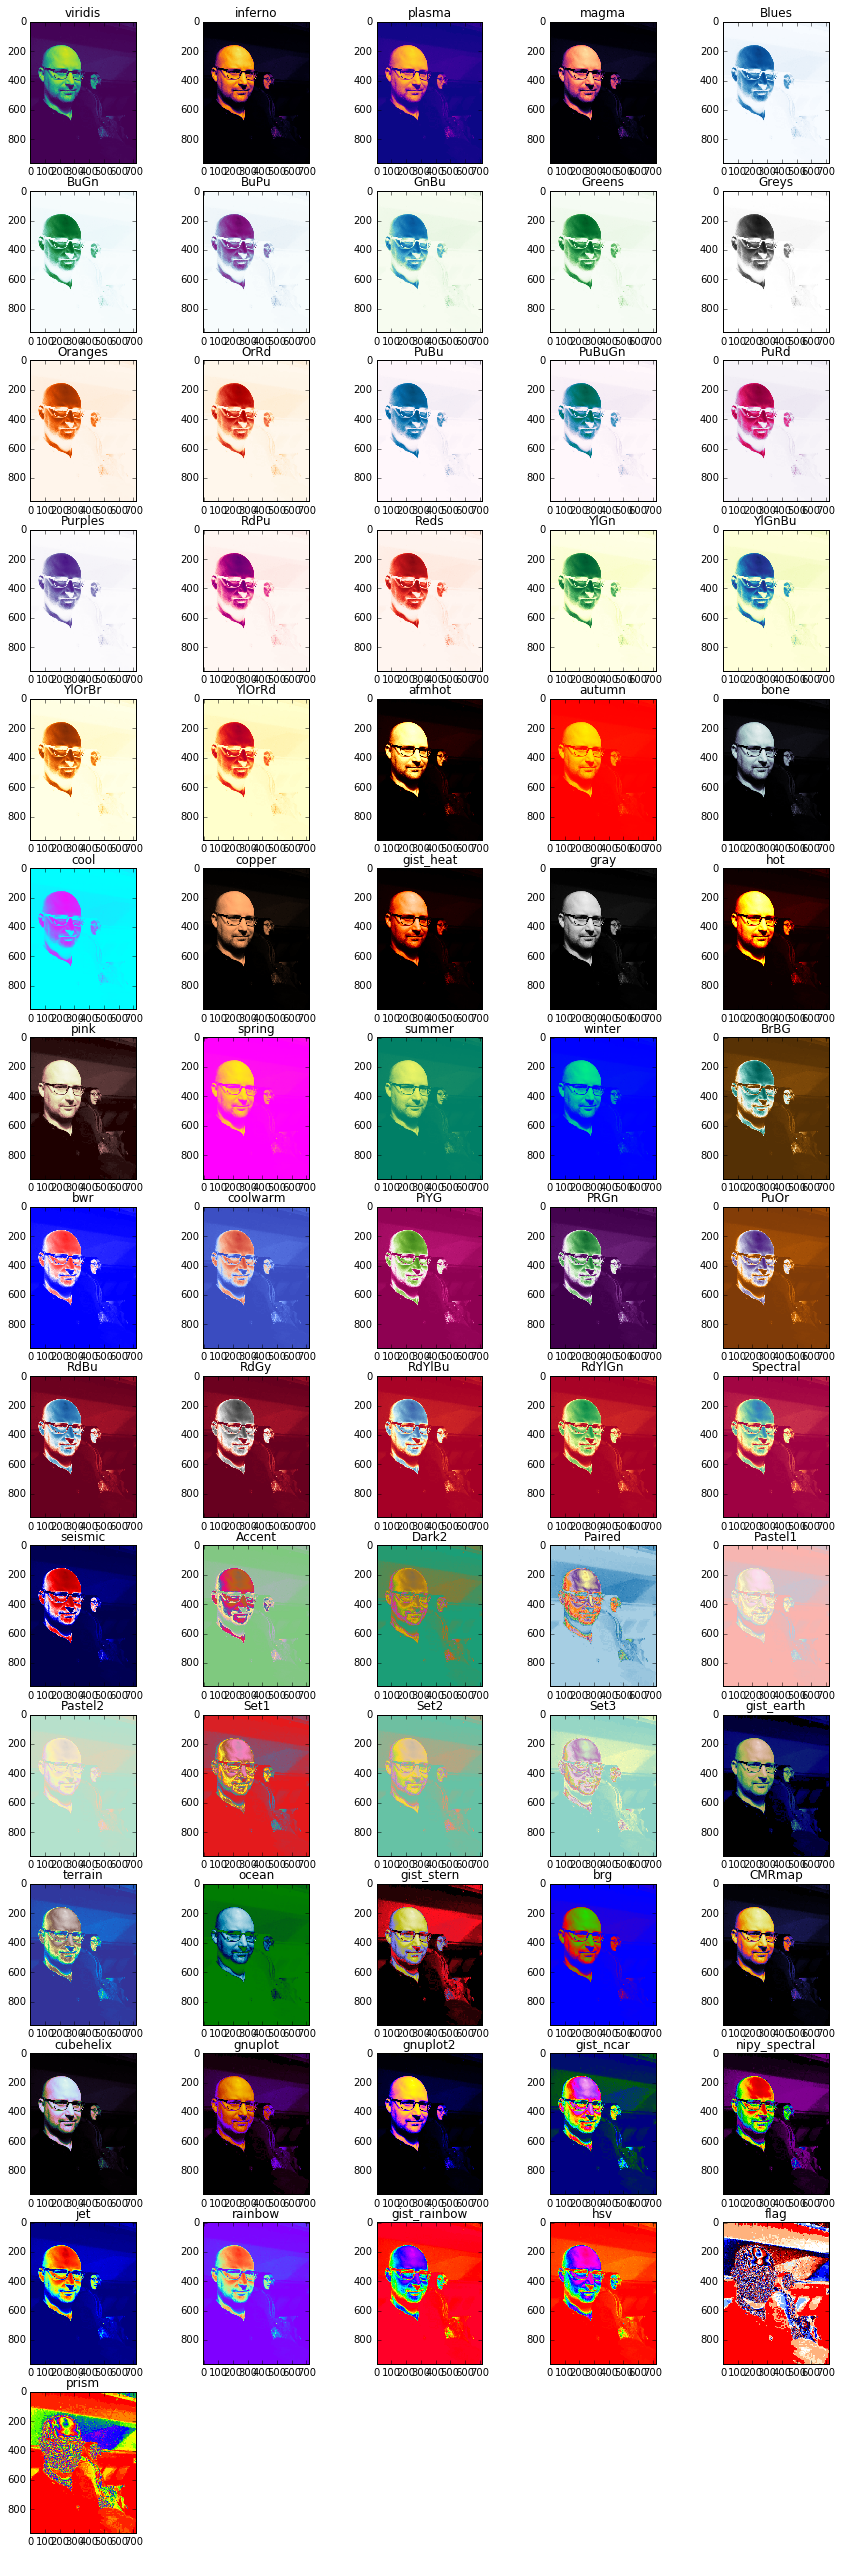

In [13]:
apply_all_cmaps(lum_bw)

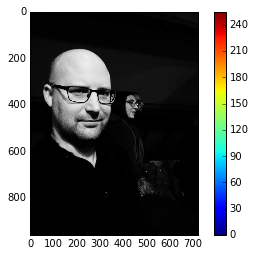

In [14]:
plt.imshow(bw)
plt.colorbar()

### Examining a specific data range

Sometimes you want to enhance the contrast in your image, or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the hist() function.

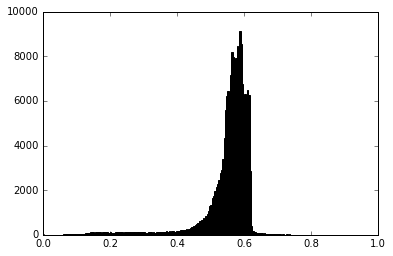

In [15]:
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k');

Most often, the “interesting” part of the image is around the peak, and you can get extra contrast by clipping the regions above and/or below the peak. In our histogram, it looks like there’s not much useful information in the high end (not many white things in the image). Let’s adjust the upper limit, so that we effectively “zoom in on” part of the histogram. We do this by passing the clim argument to imshow. You could also do this by calling the set_clim() method of the image plot object, but make sure that you do so in the same cell as your plot command when working with the IPython Notebook - it will not change plots from earlier cells.

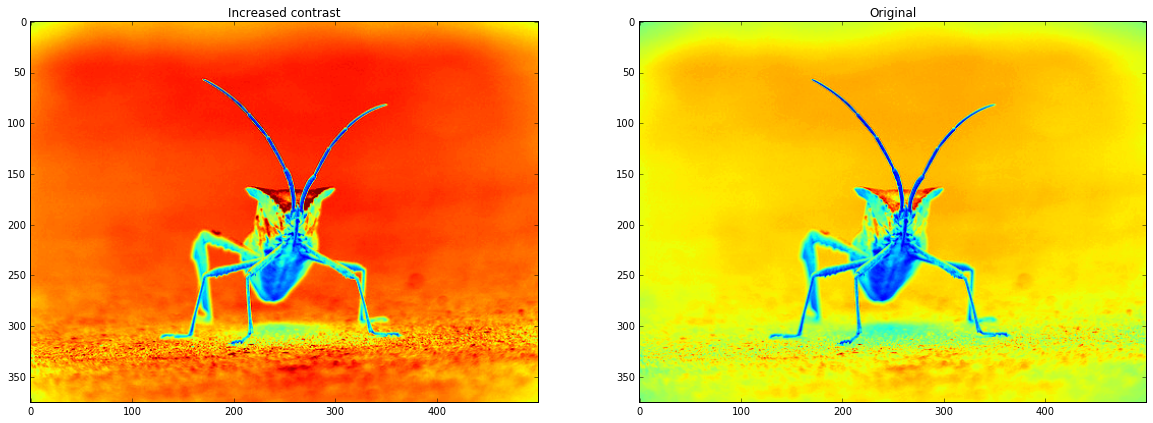

In [16]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(lum_img, clim=(0.0, 0.7))
plt.title("Increased contrast")
plt.subplot(122)
plt.imshow(lum_img)
plt.title("Original")

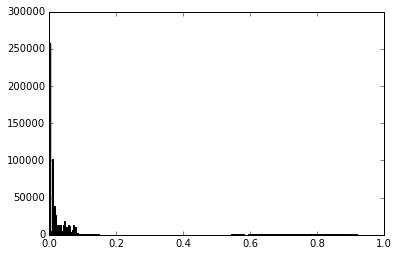

In [17]:
# and for bw?
plt.hist(lum_bw_png.ravel(), bins=256, fc='k', ec='k');

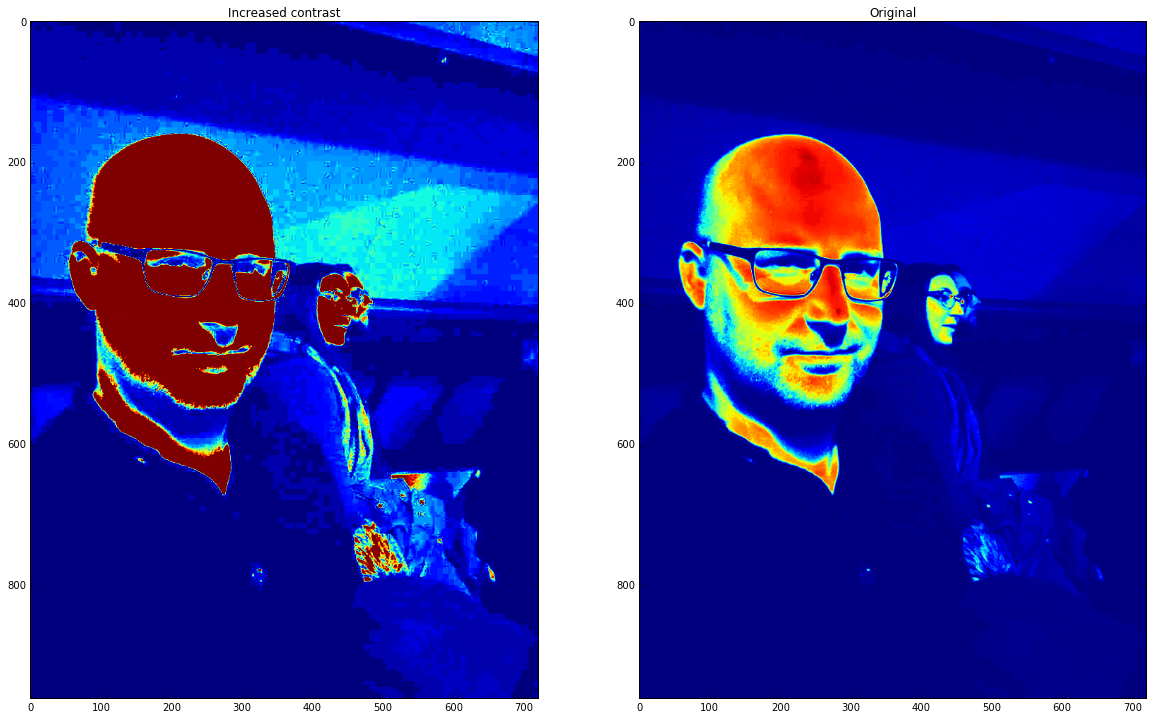

In [18]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(lum_bw_png, clim=(0.0, 0.2))
plt.title("Increased contrast")
plt.subplot(122)
plt.imshow(lum_bw_png)
plt.title("Original")

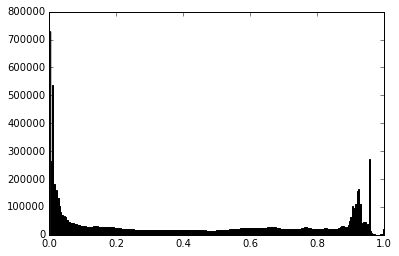

In [19]:
coffee = mpimg.imread("coffee.png")
lum_coffee = coffee[:,:,0]
plt.hist(lum_coffee.ravel(), bins=256, fc='k', ec='k');

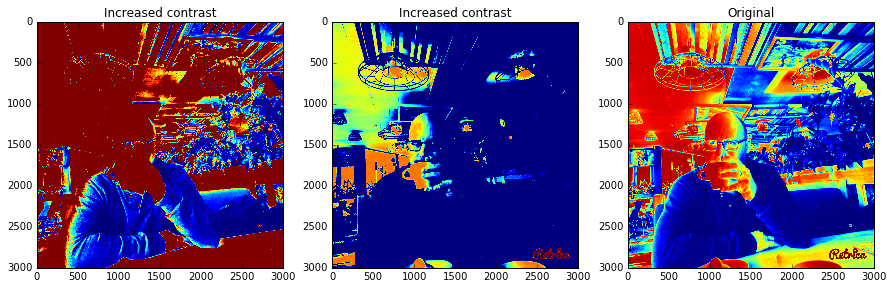

In [20]:
plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(lum_coffee, clim=(0.0, 0.2))
plt.title("Increased contrast")
plt.subplot(132)
plt.imshow(lum_coffee, clim=(0.8, 1))
plt.title("Increased contrast")
plt.subplot(133)
plt.imshow(lum_coffee)
plt.title("Original");

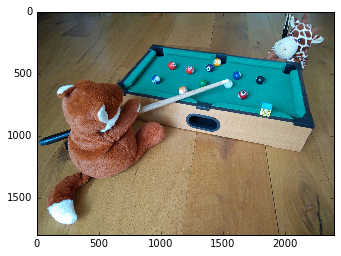

In [34]:
# can I also apply this to color photos?
pool = mpimg.imread("pool.png")
plt.imshow(pool);

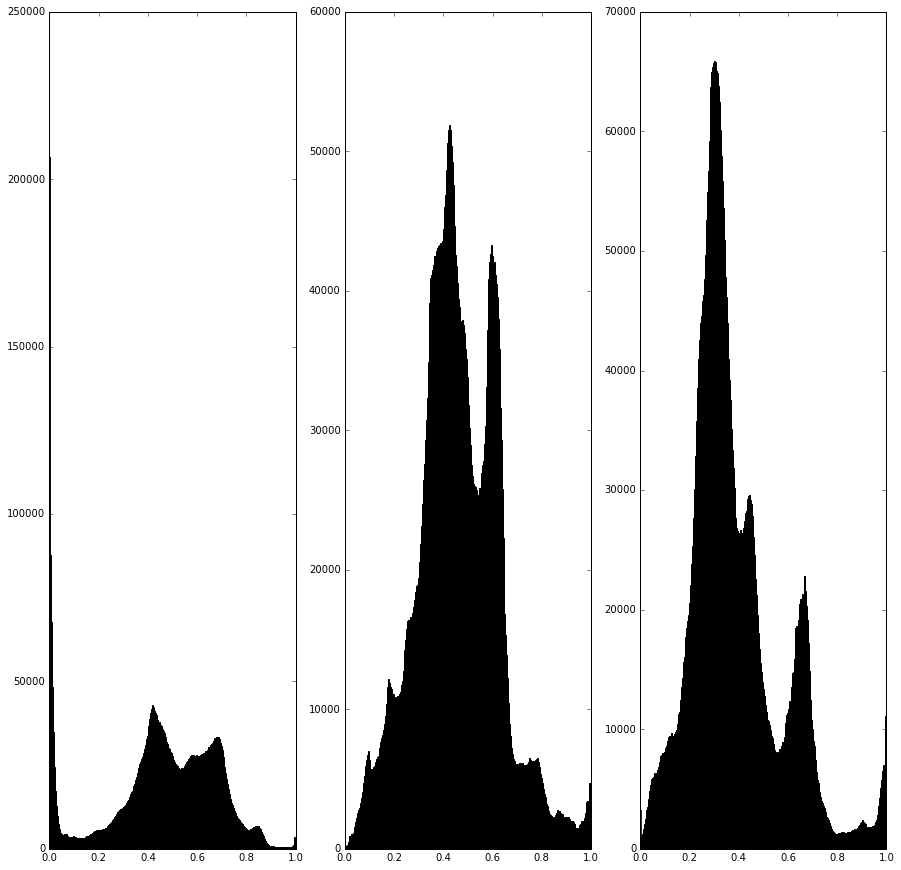

In [24]:
pool = mpimg.imread("pool.png")
lum_pool1 = pool[:,:,0]
lum_pool2 = pool[:,:,1]
lum_pool3 = pool[:,:,2]

plt.figure(figsize=(15,15))
plt.subplot(131)
plt.hist(lum_pool1.ravel(), bins=256, fc='k', ec='k');
plt.subplot(132)
plt.hist(lum_pool2.ravel(), bins=256, fc='k', ec='k');
plt.subplot(133)
plt.hist(lum_pool3.ravel(), bins=256, fc='k', ec='k');

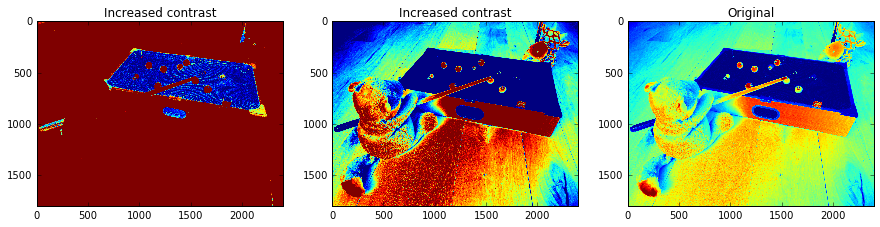

In [32]:
plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(lum_pool1, clim=(0, 0.1))
plt.title("Increased contrast")
plt.subplot(132)
plt.imshow(lum_pool1, clim=(0.25, 0.7))
plt.title("Increased contrast")
plt.subplot(133)
plt.imshow(lum_pool1)
plt.title("Original");

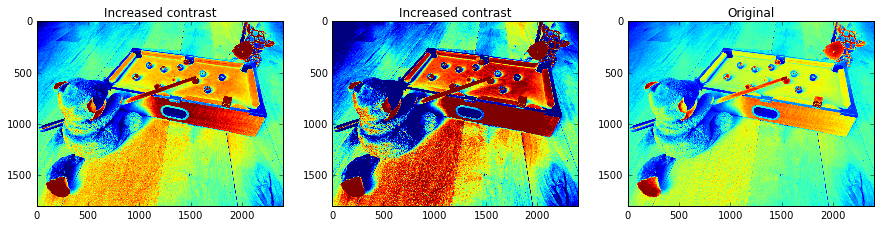

In [36]:
plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(lum_pool2, clim=(0.1, 0.8))
plt.title("Increased contrast")
plt.subplot(132)
plt.imshow(lum_pool2, clim=(0.25, 0.65))
plt.title("Increased contrast")
plt.subplot(133)
plt.imshow(lum_pool2)
plt.title("Original");

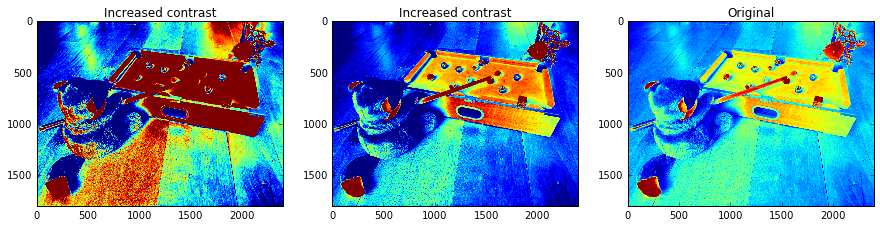

In [37]:
plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(lum_pool3, clim=(0.2, 0.5))
plt.title("Increased contrast")
plt.subplot(132)
plt.imshow(lum_pool3, clim=(0.2, 0.8))
plt.title("Increased contrast")
plt.subplot(133)
plt.imshow(lum_pool3)
plt.title("Original");

In [60]:
# can I also apply this to color photos?
# not so easy...I'll get back to that later

[0, 2400, 1800, 0]

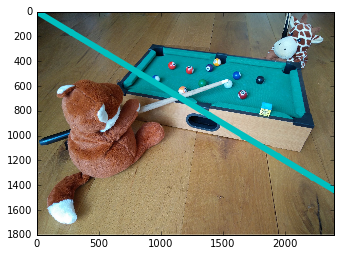

In [72]:
# can I draw lines through images?
plt.imshow(pool)
plt.plot(np.linspace(0,2500,10), np.linspace(0,1500,10), "c.-", markersize=12, linewidth=6)
plt.axis([0, 2400, 1800, 0])